In [1]:
import sys, os
import pandas as pd
import numpy as np
import warnings

import cv2
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2

Using TensorFlow backend.


In [3]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
num_features = 64
num_labels = 7
batch_size = 128
epochs = 20
width, height = 48, 48

x = np.load('/content/drive/My Drive/face_recognisation/fdataX.npy')
y = np.load('/content/drive/My Drive/face_recognisation/flabels.npy')

x -= np.mean(x, axis=0)
x /= np.std(x, axis=0)
 
print(x.shape)
a = 0
b = 0
c = 0
d = 0
e = 0
f = 0
g = 0
for i in range(35885):
  if y[i][0] == 1:
    a += 1
  if y[i][1] == 1:
    b += 1
  if y[i][2]== 1:
    c += 1
  if y[i][3] == 1:
    d  += 1
  if y[i][4] == 1:
    e += 1
  if y[i][5] == 1:
    f += 1
  if y[i][6] == 1:
    g += 1

print("angry",a)
print("disgust",b)
print("fear",c)
print("happy",d)
print("sad",e)
print("surprise",f)
print("neutral",g)
# for xx in range(2):
#     plt.figure(xx)
#     plt.imshow(x[xx].reshape((48, 48)), interpolation='none',cmap='gray')
#    # plt.show()

(35887, 48, 48, 1)
angry 4953
disgust 547
fear 5120
happy 8988
sad 6077
surprise 4002
neutral 6198


In [5]:

#splitting into training, validation and testing data
X_train, dtest, y_train, dytest = train_test_split(x, y, test_size=3/14, random_state=1,stratify = y)
X_test, X_valid, y_test, y_valid = train_test_split(dtest, dytest, test_size=1/2, random_state=1,stratify = dytest)
# X_train = X_train[0:,:]
# y_train = y_train[0:2000,:]
# X_test = X_test[0:200,:]
# y_test = y_test[0:200,:]
# X_valid = X_valid[0:200,:]
# y_valid = y_valid[0:200,:]

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)
print(y_train)
print(y_test.shape)
print(y_valid.shape)



(28196, 48, 48, 1)
(3845, 48, 48, 1)
(3846, 48, 48, 1)
[[0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]]
(3845, 7)
(3846, 7)


In [6]:
#No of class in test data 
a = 0
b = 0
c = 0
d = 0
e = 0
f = 0
g = 0
for i in range(3845):
  if y_test[i][0] == 1:
    a += 1
  if y_test[i][1] == 1:
    b += 1
  if y_test[i][2]== 1:
    c += 1
  if y_test[i][3] == 1:
    d  += 1
  if y_test[i][4] == 1:
    e += 1
  if y_test[i][5] == 1:
    f += 1
  if y_test[i][6] == 1:
    g += 1

print("angry",a)
print("disgust",b)
print("fear",c)
print("happy",d)
print("sad",e)
print("surprise",f)
print("neural",g)

angry 531
disgust 58
fear 549
happy 963
sad 651
surprise 429
neural 664


In [7]:
#No of class in train data 
a = 0
b = 0
c = 0
d = 0
e = 0
f = 0
g = 0
for i in range(28196):
  if y_train[i][0] == 1:
    a += 1
  if y_train[i][1] == 1:
    b += 1
  if y_train[i][2]== 1:
    c += 1
  if y_train[i][3] == 1:
    d  += 1
  if y_train[i][4] == 1:
    e += 1
  if y_train[i][5] == 1:
    f += 1
  if y_train[i][6] == 1:
    g += 1

print("angry",a)
print("disgust",b)
print("fear",c)
print("happy",d)
print("sad",e)
print("surprise",f)
print("neural",g)

angry 3891
disgust 430
fear 4023
happy 7063
sad 4775
surprise 3144
neural 4870


In [8]:
#No of class in validation data 
a = 0
b = 0
c = 0
d = 0
e = 0
f = 0
g = 0
for i in range(3846):
  if y_valid[i][0] == 1:
    a += 1
  if y_valid[i][1] == 1:
    b += 1
  if y_valid[i][2]== 1:
    c += 1
  if y_valid[i][3] == 1:
    d  += 1
  if y_valid[i][4] == 1:
    e += 1
  if y_valid[i][5] == 1:
    f += 1
  if y_valid[i][6] == 1:
    g += 1

print("angry",a)
print("disgust",b)
print("fear",c)
print("happy",d)
print("sad",e)
print("surprise",f)
print("neural",g)

angry 531
disgust 59
fear 549
happy 963
sad 651
surprise 429
neural 664


In [9]:
from tensorflow.keras import layers, models, datasets, Sequential

#desinging the CNN
model = Sequential()

model.add(layers.Conv2D(num_features, kernel_size=(3, 3), activation='relu', input_shape=(width, height, 1), data_format='channels_last', kernel_regularizer=l2(0.01)))
model.add(layers.Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())

model.add(layers.Dense(2*2*2*num_features, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(2*2*num_features, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(2*num_features, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(num_labels, activation='softmax'))

# model = Sequential()

# # model.add(layers.Conv2D(num_features, kernel_size=(3, 3), activation='relu', input_shape=(width, height, 1), data_format='channels_last', kernel_regularizer=l2(0.01)))
# # model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# # model.add(layers.Dropout(0.5))

# # model.add(layers.Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))

# # model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# # model.add(layers.Dropout(0.5))

# # model.add(layers.Conv2D(4*num_features, kernel_size=(3, 3), activation='relu', padding='same'))

# # model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# # model.add(layers.Dropout(0.4))
# model.add(layers.Conv2D(num_features, kernel_size=(3, 3), activation='relu', input_shape=(width, height, 1), data_format='channels_last', kernel_regularizer=l2(0.01)))
# model.add(layers.Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# model.add(layers.Dropout(0.5))

# model.add(layers.Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
# model.add(layers.BatchNormalization())
# model.add(layers.Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# model.add(layers.Dropout(0.5))

# model.add(layers.Flatten())

# model.add(layers.Dense(2*2*2*num_features, activation='relu'))
# model.add(layers.Dropout(0.4))
# model.add(layers.Dense(2*2*num_features, activation='relu'))
# model.add(layers.Dropout(0.4))
# model.add(layers.Dense(2*num_features, activation='relu'))
# model.add(layers.Dropout(0.5))

# model.add(layers.Dense(num_labels, activation='softmax'))




In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 23, 23, 128)       5

In [11]:
#Compliling the model with adam optimixer and categorical crossentropy loss
model.compile(loss=categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
#training the model
history=model.fit(np.array(X_train), np.array(y_train),
          batch_size=batch_size,
          epochs=40,
          verbose=1,
          validation_data=(np.array(X_valid), np.array(y_valid)),
          shuffle=True)

Epoch 1/40
221/221 [==============================] - 19s 85ms/step - loss: 2.0399 - accuracy: 0.2023 - val_loss: 1.8477 - val_accuracy: 0.2504
Epoch 2/40
221/221 [==============================] - 17s 78ms/step - loss: 1.8425 - accuracy: 0.2413 - val_loss: 1.8312 - val_accuracy: 0.2504
Epoch 3/40
221/221 [==============================] - 17s 79ms/step - loss: 1.7936 - accuracy: 0.2679 - val_loss: 1.7403 - val_accuracy: 0.2920
Epoch 4/40
221/221 [==============================] - 18s 80ms/step - loss: 1.7099 - accuracy: 0.3098 - val_loss: 1.6167 - val_accuracy: 0.3565
Epoch 5/40
221/221 [==============================] - 18s 81ms/step - loss: 1.6105 - accuracy: 0.3685 - val_loss: 1.4818 - val_accuracy: 0.4098
Epoch 6/40
221/221 [==============================] - 18s 82ms/step - loss: 1.5189 - accuracy: 0.4053 - val_loss: 1.4550 - val_accuracy: 0.4223
Epoch 7/40
221/221 [==============================] - 18s 82ms/step - loss: 1.4652 - accuracy: 0.4295 - val_loss: 1.3633 - val_accuracy:

In [13]:
a = model.evaluate(X_test, y_test, batch_size=128)



31/31 [==============================] - 1s 28ms/step - loss: 1.0597 - accuracy: 0.6395


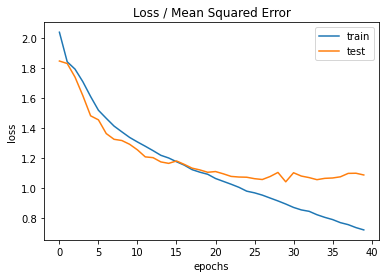

In [30]:
from matplotlib import pyplot

train_mse = model.evaluate(X_train, y_train, verbose=0)
test_mse = model.evaluate(X_test, y_test, verbose=0)
 #print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
plt.xlabel('epochs')
plt.ylabel('loss')
pyplot.legend()
pyplot.show()

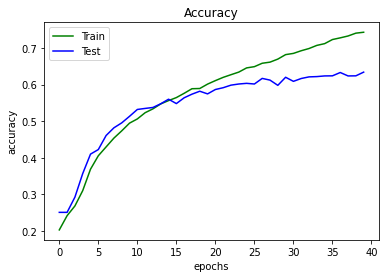

In [31]:
loss_t = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(0,40)
plt.plot(epochs, loss_t,'g',label = 'Train' )
plt.plot(epochs, loss_val,'b',label = 'Test' )
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
yp = model.predict(X_test)

In [ ]:
print(yp.shape)
print(y_test.shape)
print("accuracy=",100*a[1])

(3845, 7)
(3845, 7)
accuracy= 65.30559062957764


In [ ]:
#confusion matrix
truey=[]
predy=[]
x = X_test
y = y_test

yhat= model.predict(x)
yh = yhat.tolist()
yt = y.tolist()
count = 0

for i in range(len(y)):
    yy = max(yh[i])
    yyt = max(yt[i])
    predy.append(yh[i].index(yy))
    truey.append(yt[i].index(yyt))
    if(yh[i].index(yy)== yt[i].index(yyt)):
        count+=1

acc = (count/len(y))*100



[[311  16  65  22  71   4  32]
 [  2  35   2   0   3   2   2]
 [ 39   2 251  17  77  60  34]
 [ 22   1  23 828  34  28  47]
 [ 68   2  98  27 314   4  87]
 [  8   0  34   5   3 313   3]
 [ 81   2  76  64 149  18 459]]


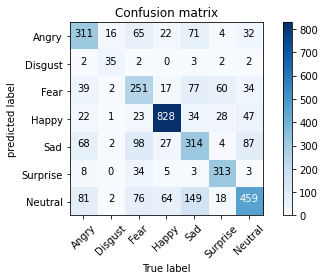

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_true = predy
y_pred = truey
cm = confusion_matrix(y_true, y_pred)
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
title='Confusion matrix'
print(cm)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.ylabel('predicted label')
plt.xlabel('True label')
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras import layers, models, datasets, Sequential

model1 = models.Model(inputs = model.inputs, outputs = model.layers[1].output)
model1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 48, 48, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 64)        36928     
Total params: 37,568
Trainable params: 37,568
Non-trainable params: 0
_________________________________________________________________


(48, 48, 1)


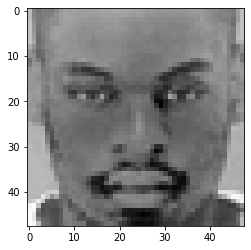

In [ ]:
print(X_train[1].shape)
#visualization of feature map
plt.imshow(np.reshape(X_train[1], (48,48)),cmap='gray')
plt.show()

In [ ]:
feature_maps1 = model1.predict(np.reshape(X_train[1], (1,48,48,1)))

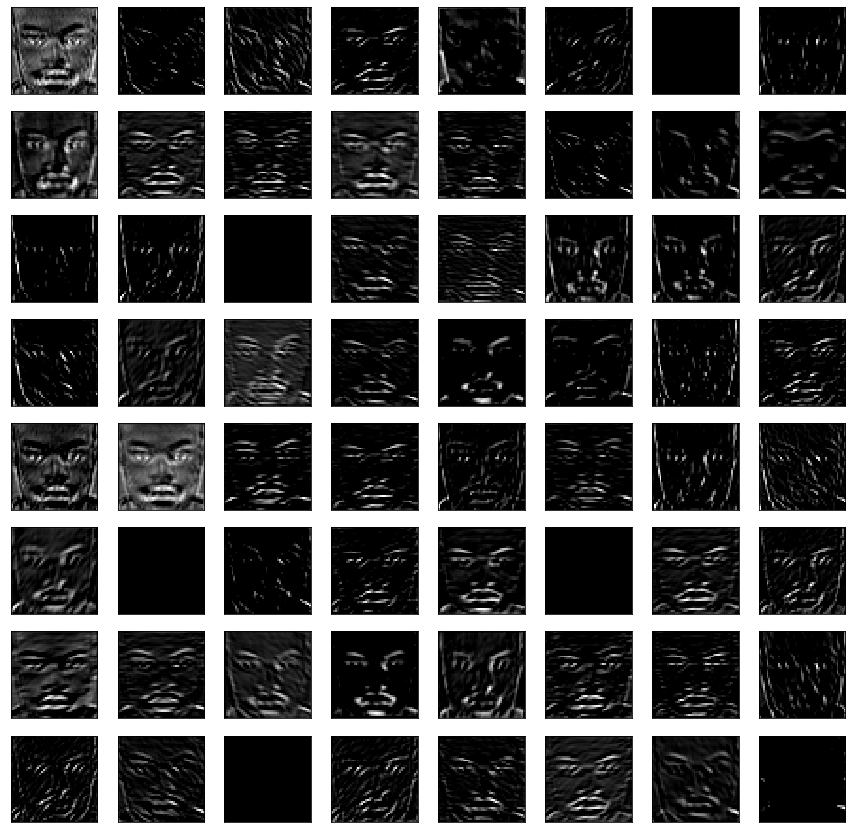

In [ ]:
square = 8

#fliter number
ix = 1
plt.figure(figsize=(15,15))
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_maps1[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
plt.show()

In [ ]:
model2 = models.Model(inputs = model.inputs, outputs = model.layers[2].output)
model2.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 48, 48, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 64)        256       
Total params: 37,824
Trainable params: 37,696
Non-trainable params: 128
_________________________________________________________________


In [ ]:
feature_maps2 = model2.predict(np.reshape(X_train[1], (1,48,48,1)))

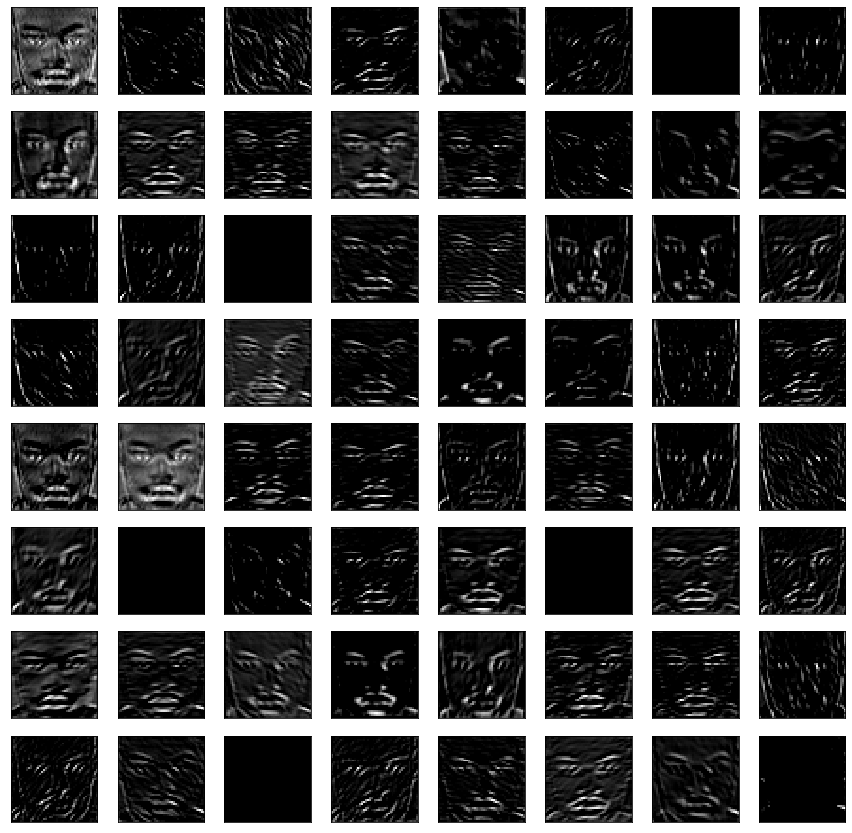

In [ ]:
square = 8

#fliter number
ix = 1
plt.figure(figsize=(15,15))
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_maps2[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
plt.show()